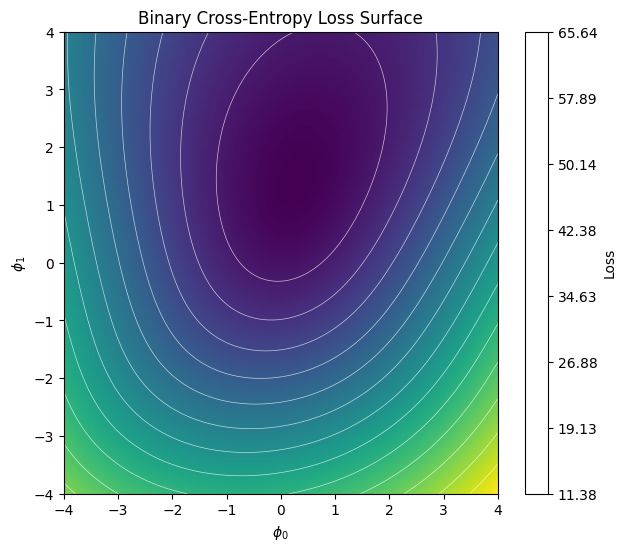

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate data
x0 = np.random.normal(-1.0, 1.0, 10)
y0 = np.zeros(10)

x1 = np.random.normal(1.0, 1.0, 10)
y1 = np.ones(10)

x = np.concatenate([x0, x1])
y = np.concatenate([y0, y1])

# Sigmoid and loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(phi0, phi1):
    z = phi0 + phi1 * x
    p = sigmoid(z)
    eps = 1e-12
    p = np.clip(p, eps, 1 - eps) # Keep p from exact 0 or 1 to prevent overflow
    return -np.sum((1 - y) * np.log(1 - p) + y * np.log(p))

# Grid
phi0_vals = np.linspace(-4, 4, 200)
phi1_vals = np.linspace(-4, 4, 200)
loss_grid = np.zeros((len(phi1_vals), len(phi0_vals)))

for i, phi1 in enumerate(phi1_vals):
    for j, phi0 in enumerate(phi0_vals):
        loss_grid[i, j] = loss(phi0, phi1)

# Plot
plt.figure(figsize=(7, 6))
plt.imshow(
    loss_grid,
    extent=[phi0_vals.min(), phi0_vals.max(), phi1_vals.min(), phi1_vals.max()],
    origin="lower",
    aspect="auto",
)

# Add level curves (contours)
min_loss = np.min(loss_grid)
max_loss = np.max(loss_grid)
contour_levels = np.linspace(min_loss, max_loss, 15)
plt.contour(
    phi0_vals, 
    phi1_vals, 
    loss_grid, 
    levels=contour_levels,
    colors='white',
    alpha=0.7,
    linewidths=0.5
)

plt.colorbar(label="Loss")
plt.xlabel(r"$\phi_0$")
plt.ylabel(r"$\phi_1$")
plt.title("Binary Cross‑Entropy Loss Surface")
plt.show()